In [1]:
# General Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time

# General Mathematics package
import math as math

# Graphing Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Statistics Packages
from scipy.stats import randint
from scipy.stats import skew

# Machine Learning Packages
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn import preprocessing
from skimage.transform import resize
import xgboost as xgb

# Neural Network Packages
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import tensorflow as tf

# H2o packages
import h2o
from h2o.automl import H2OAutoML

Using TensorFlow backend.


In [2]:
cancer = pd.read_csv("data.csv")
cancer.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
pixel_8 = pd.read_csv("hmnist_8_8_L.csv")
pixel_8_rgb = pd.read_csv("hmnist_8_8_RGB.csv")

In [4]:
cancer.shape

(10015, 7)

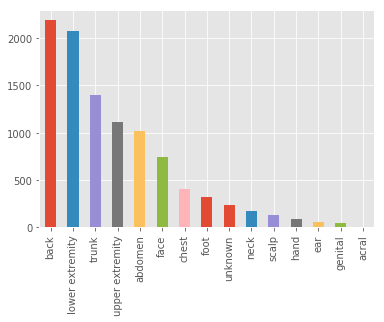

In [5]:
cancer.localization.value_counts().plot.bar()
plt.show()

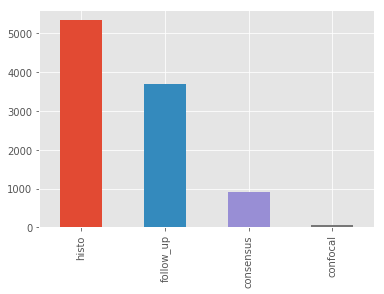

In [6]:
cancer.dx_type.value_counts().plot.bar()
plt.show()

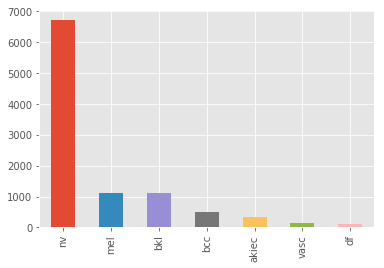

In [7]:
cancer.dx.value_counts().plot.bar()
plt.show()

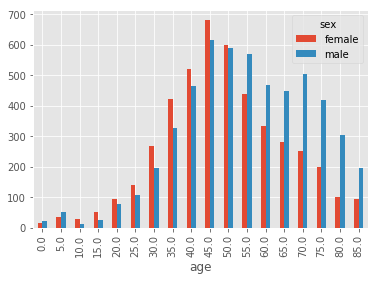

In [8]:
pd.crosstab(cancer.age , cancer.sex).drop("unknown" , axis = 1).plot.bar()
plt.show()

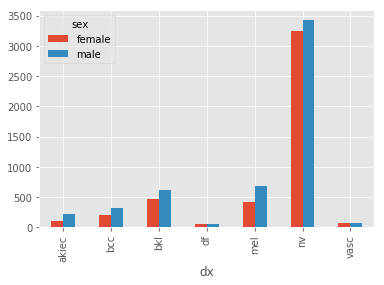

In [9]:
pd.crosstab(cancer.dx , cancer.sex).drop("unknown" , axis = 1).plot.bar()
plt.show()

In [10]:
train = cancer.sort_values('image_id')[0:5000]
test = cancer.sort_values('image_id')[5000:]

In [11]:
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(train.dx)
y_test = le.fit_transform(test.dx)

In [12]:
cancer.iloc[4349]

lesion_id        HAM_0000550
image_id        ISIC_0024306
dx                        nv
dx_type            follow_up
age                       45
sex                     male
localization           trunk
Name: 4349, dtype: object

In [13]:
from skimage import io

In [14]:
imgbt = io.imread('cancer image 1/ISIC_0024306.jpg')

In [15]:
imgbt.shape

(450, 600, 3)

In [16]:
pixel_train = []
for n in range(0,len(train)):
    pixel_train.append(io.imread('cancer image 1/' + str(train.image_id.iloc[n]) + '.jpg'))
    
pixel_test = []
for n in range(0,len(test)):
    pixel_test.append(io.imread('cancer image 2/' + str(test.image_id.iloc[n]) + '.jpg'))

In [17]:
images = pd.Series(pixel_train)
images_test = pd.Series(pixel_test)

In [18]:
train["images"] = images
test["images"] = images_test
train.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,images
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,"[[[226, 176, 179], [224, 175, 178], [224, 174,..."
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,"[[[215, 129, 158], [216, 129, 161], [214, 129,..."
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,"[[[248, 163, 156], [247, 163, 161], [246, 160,..."
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,"[[[160, 139, 146], [158, 136, 148], [159, 138,..."
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,"[[[234, 147, 181], [232, 146, 181], [230, 144,..."


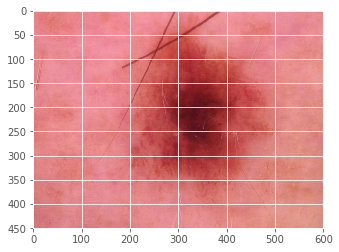

In [19]:
plt.imshow(train.images[0])
plt.show()

In [20]:
pixel_train = np.array(pd.Series(pixel_train))
pixel_test = np.array(pd.Series(pixel_test))

In [21]:
warnings.filterwarnings("ignore")

rs = []

for n in range(0,len(train)):
    rs.append(resize(pixel_train[n] , (75,100)))
    
rs_test = []

for n in range(0, len(test)):
    rs_test.append(resize(pixel_test[n] , (75,100)))

In [22]:
rs[0].shape

(75, 100, 3)

In [23]:
train["resized images"] = rs
test["resized images"] = rs_test

In [24]:
X_train = rs
X_test = rs_test

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [26]:
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test , 7)

In [27]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

model = Sequential()
model.add(Conv2D(32,(3,3) , input_shape = (75,100,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
for n in range(1,200):
    model.add(Dense(units = n , activation = 'relu'))
model.add(Dense(units = 7 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [28]:
model.fit(X_train , y_train, batch_size = 30 ,  epochs = 3, validation_data = (X_test , y_test) , validation_split=0.2,
          verbose = 2 , callbacks=[early_stopping_monitor])

Train on 5000 samples, validate on 5015 samples
Epoch 1/3
 - 34s - loss: 1.9024 - acc: 0.6824 - val_loss: 1.8650 - val_acc: 0.6528
Epoch 2/3
 - 24s - loss: 1.8209 - acc: 0.6862 - val_loss: 1.7908 - val_acc: 0.6528
Epoch 3/3
 - 24s - loss: 1.7449 - acc: 0.6862 - val_loss: 1.7216 - val_acc: 0.6528


In [29]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

for n in range (1,200):
    model_tf = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3) , input_shape = (75,100,3) , activation = tf.nn.relu),
      tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(n, activation=tf.nn.relu),
      tf.keras.layers.Dense(7 , activation=tf.nn.sigmoid)
    ])
model_tf.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_tf.fit(X_train , y_train, batch_size = 30 ,  epochs = 20, validation_data = (X_test , y_test) , validation_split=0.2,
          verbose = 2 , callbacks=[early_stopping_monitor])

Train on 5000 samples, validate on 5015 samples
Epoch 1/20
 - 62s - loss: 1.2775 - acc: 0.6596 - val_loss: 1.0044 - val_acc: 0.6528
Epoch 2/20
 - 39s - loss: 0.8645 - acc: 0.6862 - val_loss: 0.9689 - val_acc: 0.6518
Epoch 3/20
 - 38s - loss: 0.7983 - acc: 0.6924 - val_loss: 0.9118 - val_acc: 0.6666
Epoch 4/20
 - 38s - loss: 0.7510 - acc: 0.7092 - val_loss: 0.9014 - val_acc: 0.6754
Epoch 5/20
 - 37s - loss: 0.6944 - acc: 0.7372 - val_loss: 0.9108 - val_acc: 0.6566
Epoch 6/20
 - 38s - loss: 0.6397 - acc: 0.7478 - val_loss: 0.9122 - val_acc: 0.6724
Epoch 00006: early stopping


In [30]:
train_1 = cancer.sort_values('image_id')[0:2000]
test_1 = cancer.sort_values('image_id')[2000:]

In [31]:
pixel_train_1 = []
for n in range(0,len(train_1)):
    pixel_train_1.append(io.imread('cancer image 1/' + str(train_1.image_id.iloc[n]) + '.jpg'))
    
pixel_test_1 = []
for n in range(0,3000):
    pixel_test_1.append(io.imread('cancer image 1/' + str(test_1.image_id.iloc[n]) + '.jpg'))
for n in range(3000,len(test_1)):    
    pixel_test_1.append(io.imread('cancer image 2/' + str(test_1.image_id.iloc[n]) + '.jpg'))

In [32]:
pixel_train_1 = np.array(pd.Series(pixel_train_1))
pixel_test_1 = np.array(pd.Series(pixel_test_1))

In [33]:
warnings.filterwarnings("ignore")

rs_1 = []

for n in range(0,len(train_1)):
    rs_1.append(resize(pixel_train_1[n] , (75,100)))
    
rs_test_1 = []

for n in range(0, len(test_1)):
    rs_test_1.append(resize(pixel_test_1[n] , (75,100)))

In [34]:
train_1["resized images"] = rs_1
test_1["resized images"] = rs_test_1

In [35]:
X_train_1 = rs_1
X_test_1 = rs_test_1
y_train_1 = le.fit_transform(train_1.dx)
y_test_1 = le.fit_transform(test_1.dx)

In [36]:
X_train_1 = np.array(X_train_1)
X_test_1 = np.array(X_test_1)
y_train_1 = np_utils.to_categorical(y_train_1, 7)
y_test_1 = np_utils.to_categorical(y_test_1 , 7)

In [37]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
model = Sequential()
model.add(Conv2D(32,(3,3) , input_shape = (75,100,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dense(units = 7 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [38]:
model.fit(X_train_1 , y_train_1, batch_size = 30 ,  epochs = 20, validation_data = (X_test_1 , y_test_1) , validation_split=0.2,
          verbose = 2 , callbacks=[early_stopping_monitor])

Train on 2000 samples, validate on 8015 samples
Epoch 1/20
 - 28s - loss: 1.2958 - acc: 0.6440 - val_loss: 1.0626 - val_acc: 0.6655
Epoch 2/20
 - 23s - loss: 0.9088 - acc: 0.6855 - val_loss: 1.0781 - val_acc: 0.6655
Epoch 3/20
 - 23s - loss: 0.8378 - acc: 0.6850 - val_loss: 0.9325 - val_acc: 0.6656
Epoch 4/20
 - 23s - loss: 0.7673 - acc: 0.6865 - val_loss: 0.9410 - val_acc: 0.6655
Epoch 5/20
 - 23s - loss: 0.7252 - acc: 0.6875 - val_loss: 0.9015 - val_acc: 0.6641
Epoch 6/20
 - 23s - loss: 0.6916 - acc: 0.6920 - val_loss: 0.8803 - val_acc: 0.6665
Epoch 7/20
 - 23s - loss: 0.6302 - acc: 0.7235 - val_loss: 0.9247 - val_acc: 0.6775
Epoch 8/20
 - 23s - loss: 0.5732 - acc: 0.7805 - val_loss: 0.9256 - val_acc: 0.6675
Epoch 00008: early stopping


In [39]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3) , input_shape = (75,100,3) , activation = tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(200 , activation = tf.nn.relu),
  tf.keras.layers.Dense(7 , activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_1 , y_train_1, batch_size = 30 ,  epochs = 20, validation_data = (X_test_1 , y_test_1) , validation_split=0.2,
          verbose = 2 , callbacks=[early_stopping_monitor])

Train on 2000 samples, validate on 8015 samples
Epoch 1/20
 - 25s - loss: 1.5825 - acc: 0.5785 - val_loss: 1.1352 - val_acc: 0.6655
Epoch 2/20
 - 22s - loss: 0.9496 - acc: 0.6855 - val_loss: 0.9676 - val_acc: 0.6655
Epoch 3/20
 - 22s - loss: 0.8537 - acc: 0.6855 - val_loss: 0.9179 - val_acc: 0.6655
Epoch 4/20
 - 22s - loss: 0.7950 - acc: 0.6875 - val_loss: 0.9128 - val_acc: 0.6677
Epoch 5/20
 - 22s - loss: 0.7421 - acc: 0.7110 - val_loss: 0.9328 - val_acc: 0.6717
Epoch 6/20
 - 22s - loss: 0.6825 - acc: 0.7490 - val_loss: 0.9099 - val_acc: 0.6822
Epoch 7/20
 - 22s - loss: 0.6291 - acc: 0.7600 - val_loss: 0.8897 - val_acc: 0.6883
Epoch 8/20
 - 22s - loss: 0.5551 - acc: 0.7975 - val_loss: 0.9181 - val_acc: 0.6830
Epoch 9/20
 - 22s - loss: 0.5098 - acc: 0.8130 - val_loss: 0.9637 - val_acc: 0.6719
Epoch 00009: early stopping
